Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package. 


# 0. **Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [25]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tqdm import tqdm

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [4]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [5]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


# 0-1. __CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [6]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT)

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, input_X_test.shape, output_Y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 32, 32, 3),
 (10000, 10))

# 0-2. **Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

Sample input image: [[[0.10980392 0.09803922 0.03921569]
  [0.14509805 0.13333334 0.07450981]
  [0.14901961 0.13725491 0.07843138]
  ...
  [0.29803923 0.2627451  0.15294118]
  [0.31764707 0.28235295 0.16862746]
  [0.33333334 0.29803923 0.18431373]]

 [[0.12941177 0.10980392 0.05098039]
  [0.13333334 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254903 0.32156864 0.21568628]
  [0.3764706  0.32156864 0.21960784]
  [0.33333334 0.28235295 0.1764706 ]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941177 0.06666667]
  [0.22352941 0.19607843 0.12941177]
  ...
  [0.3647059  0.29803923 0.20392157]
  [0.41960785 0.34901962 0.25882354]
  [0.37254903 0.3019608  0.21176471]]

 ...

 [[0.3254902  0.28627452 0.20392157]
  [0.34117648 0.3019608  0.21960784]
  [0.32941177 0.2901961  0.20392157]
  ...
  [0.3882353  0.3647059  0.27450982]
  [0.3529412  0.32941177 0.23921569]
  [0.31764707 0.29411766 0.20392157]]

 [[0.34509805 0.28235295 0.2       ]
  [0.3529412  0.2

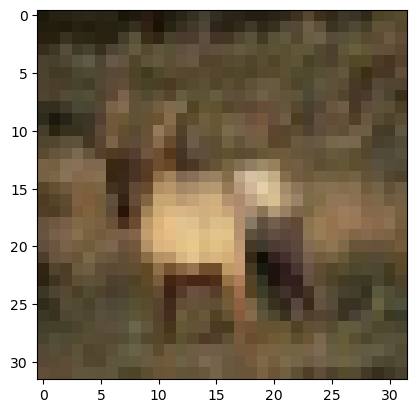

'Selected_Image = 3\nimage = input_X_train[Selected_Image]\nprint ("Sample input image: " + str(image))\nplt.imshow(image)\nplt.show() '

In [10]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

'''Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() '''


# 0-3. Helper functions

In [19]:
# Checkpoints
import os

checkpoint_path = "results/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = [ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 mode='min',
                                                 verbose=1),
                EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min',  min_delta=0.0001)]

In [61]:
def five_runs(build_model_func, num_runs=5, history_verbose=VERBOSE):
    accuracy_history_df = pd.DataFrame()
    loss_history_df = pd.DataFrame()
    test_result_df = pd.DataFrame(index=['Test score/loss', 'Test accuracy'])
    for i in tqdm(range(num_runs)):
        input_model = build_model_func()
        print("Run number: " + str(i))
        history = input_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_data = (X_val, y_val),  verbose=history_verbose, callbacks=[cp_callback])
        score = input_model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
        print("\nTest score/loss:", score[0])
        print('Test accuracy:', score[1])

        for epoch in range(len(history.history['accuracy'])):
            accuracy_history_df.loc[epoch, i] = history.history['accuracy'][epoch]
            loss_history_df.loc[epoch, i] = history.history['loss'][epoch]
        test_result_df.loc['Test score/loss', i] = score[0]
        test_result_df.loc['Test accuracy', i] = score[1]
    return accuracy_history_df, loss_history_df, test_result_df


# 1. **Simple CNN model definition**

This code defines a simple CNN network.
The model will learn 32 convolutional filters, each of a 3 x 3 size. The output dimension is the same one of the input shape, with a 32 x 32 filters (default stride of 1 is used). The activation function ReLU will be used. 
The network then has a max-pooling layer with pool size 2 x 2, and a dropout at 25%.

The next level of depth has a dense layer with 512 units and ReLU activation, followed by a dropout at 50%.
Finally, a softmax layer is used with 10 units/classes as output, i.e. one for each of the 10 classes of objects encoded with one-hot coding.

## Baseline: 1 Lab model

### 1 run

In [20]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary. 


In [21]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [22]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=3, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE, callbacks=[cp_callback])


Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.6697 - accuracy: 0.4032
Epoch 1: val_loss improved from inf to 1.43317, saving model to results\cp.ckpt
313/313 [==============================] - 22s 68ms/step - loss: 1.6689 - accuracy: 0.4035 - val_loss: 1.4332 - val_accuracy: 0.4925
Epoch 2/3
313/313 [==============================] - ETA: 0s - loss: 1.3393 - accuracy: 0.5258
Epoch 2: val_loss improved from 1.43317 to 1.21777, saving model to results\cp.ckpt
313/313 [==============================] - 20s 64ms/step - loss: 1.3393 - accuracy: 0.5258 - val_loss: 1.2178 - val_accuracy: 0.5704
Epoch 3/3
313/313 [==============================] - ETA: 0s - loss: 1.2122 - accuracy: 0.5730
Epoch 3: val_loss improved from 1.21777 to 1.17475, saving model to results\cp.ckpt
313/313 [==============================] - 20s 64ms/step - loss: 1.2122 - accuracy: 0.5730 - val_loss: 1.1748 - val_accuracy: 0.5891


**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


79/79 [==============================] - 1s 11ms/step - loss: 1.1612 - accuracy: 0.5852

Test score/loss: 1.1611535549163818
Test accuracy: 0.5852000117301941
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


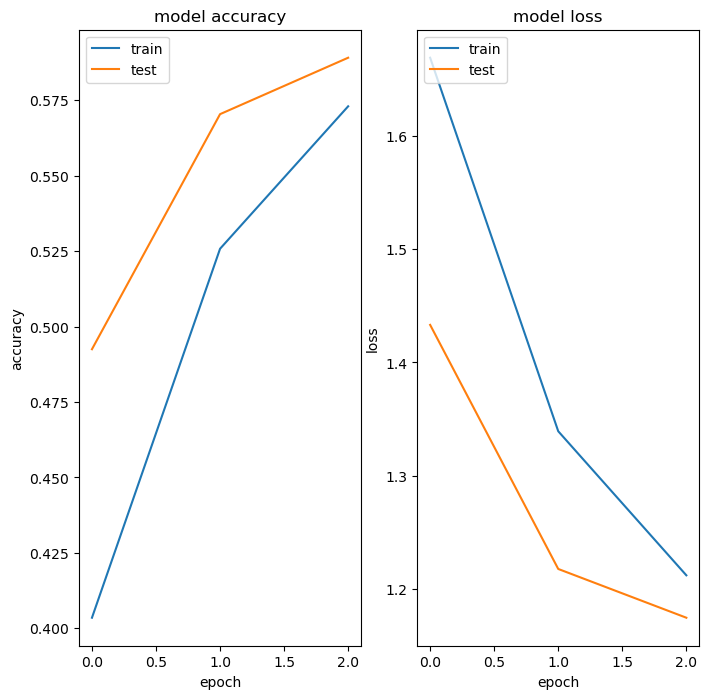

In [23]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### 5 runs

In [62]:
def build_simple_model():
    # network definition

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))

    # print('CNN network definition.')
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    return model

In [64]:
acc_df_base, loss_df_base, test_df_base = five_runs(build_model_func=build_simple_model, history_verbose=1)

  0%|          | 0/5 [00:00<?, ?it/s]

Run number: 0
Epoch 1/20
312/313 [============================>.] - ETA: 0s - loss: 1.7477 - accuracy: 0.3855
Epoch 1: val_loss did not improve from 0.92372
313/313 [==============================] - 22s 62ms/step - loss: 1.7476 - accuracy: 0.3857 - val_loss: 1.4117 - val_accuracy: 0.4965
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 1.3789 - accuracy: 0.5126
Epoch 2: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 60ms/step - loss: 1.3788 - accuracy: 0.5127 - val_loss: 1.3697 - val_accuracy: 0.5270
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 1.2441 - accuracy: 0.5623
Epoch 3: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 60ms/step - loss: 1.2438 - accuracy: 0.5624 - val_loss: 1.2688 - val_accuracy: 0.5503
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 1.1509 - accuracy: 0.5953
Epoch 4: val_loss did not improve from 0.92372
313/313 [======

 20%|██        | 1/5 [06:26<25:45, 386.35s/it]

Run number: 1
Epoch 1/20
312/313 [============================>.] - ETA: 0s - loss: 1.7076 - accuracy: 0.3940
Epoch 1: val_loss did not improve from 0.92372
313/313 [==============================] - 20s 62ms/step - loss: 1.7070 - accuracy: 0.3942 - val_loss: 1.3924 - val_accuracy: 0.5114
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 1.3689 - accuracy: 0.5166
Epoch 2: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 62ms/step - loss: 1.3687 - accuracy: 0.5167 - val_loss: 1.2785 - val_accuracy: 0.5450
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 1.2376 - accuracy: 0.5630
Epoch 3: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 62ms/step - loss: 1.2376 - accuracy: 0.5630 - val_loss: 1.4939 - val_accuracy: 0.4842
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 1.1454 - accuracy: 0.6002
Epoch 4: val_loss did not improve from 0.92372
313/313 [======

 40%|████      | 2/5 [12:37<18:52, 377.64s/it]

Run number: 2
Epoch 1/20
312/313 [============================>.] - ETA: 0s - loss: 1.7563 - accuracy: 0.3798
Epoch 1: val_loss did not improve from 0.92372
313/313 [==============================] - 20s 61ms/step - loss: 1.7559 - accuracy: 0.3799 - val_loss: 1.5137 - val_accuracy: 0.4459
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 1.3901 - accuracy: 0.5068
Epoch 2: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 60ms/step - loss: 1.3901 - accuracy: 0.5068 - val_loss: 1.3323 - val_accuracy: 0.5315
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 1.2573 - accuracy: 0.5578
Epoch 3: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 61ms/step - loss: 1.2573 - accuracy: 0.5579 - val_loss: 1.1944 - val_accuracy: 0.5791
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 1.1676 - accuracy: 0.5887
Epoch 4: val_loss did not improve from 0.92372
313/313 [======

 60%|██████    | 3/5 [17:43<11:29, 344.63s/it]


Test score/loss: 1.058442234992981
Test accuracy: 0.6593999862670898
Run number: 3
Epoch 1/20
312/313 [============================>.] - ETA: 0s - loss: 1.7772 - accuracy: 0.3782
Epoch 1: val_loss did not improve from 0.92372
313/313 [==============================] - 20s 62ms/step - loss: 1.7767 - accuracy: 0.3783 - val_loss: 1.5172 - val_accuracy: 0.4668
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 1.3793 - accuracy: 0.5136
Epoch 2: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 61ms/step - loss: 1.3794 - accuracy: 0.5135 - val_loss: 1.3230 - val_accuracy: 0.5394
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 1.2455 - accuracy: 0.5618
Epoch 3: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 61ms/step - loss: 1.2454 - accuracy: 0.5618 - val_loss: 1.1874 - val_accuracy: 0.5785
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 1.1609 - accuracy:

 80%|████████  | 4/5 [22:33<05:23, 323.27s/it]


Test score/loss: 1.0500319004058838
Test accuracy: 0.6620000004768372
Run number: 4
Epoch 1/20
312/313 [============================>.] - ETA: 0s - loss: 1.7465 - accuracy: 0.3858
Epoch 1: val_loss did not improve from 0.92372
313/313 [==============================] - 21s 64ms/step - loss: 1.7464 - accuracy: 0.3859 - val_loss: 1.5883 - val_accuracy: 0.4350
Epoch 2/20
312/313 [============================>.] - ETA: 0s - loss: 1.3792 - accuracy: 0.5109
Epoch 2: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 62ms/step - loss: 1.3791 - accuracy: 0.5108 - val_loss: 1.3240 - val_accuracy: 0.5397
Epoch 3/20
312/313 [============================>.] - ETA: 0s - loss: 1.2555 - accuracy: 0.5585
Epoch 3: val_loss did not improve from 0.92372
313/313 [==============================] - 19s 61ms/step - loss: 1.2556 - accuracy: 0.5584 - val_loss: 1.1864 - val_accuracy: 0.5901
Epoch 4/20
312/313 [============================>.] - ETA: 0s - loss: 1.1599 - accuracy

100%|██████████| 5/5 [28:22<00:00, 340.56s/it]


Test score/loss: 0.9984637498855591
Test accuracy: 0.6740000247955322


Text(0.5, 1.0, 'Baseline Accuracy')

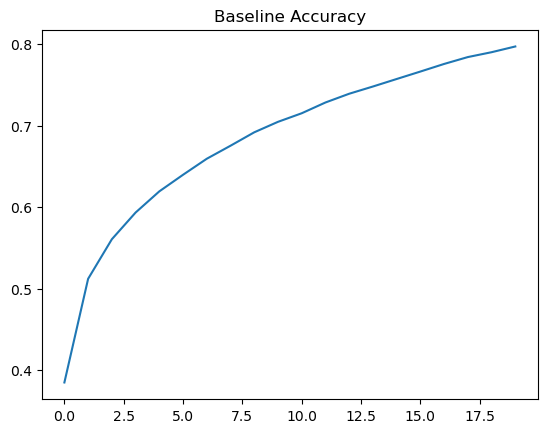

In [67]:
acc_df_base.mean(axis=1).plot()
plt.title('Baseline Accuracy')

Text(0.5, 1.0, 'Baseline Loss')

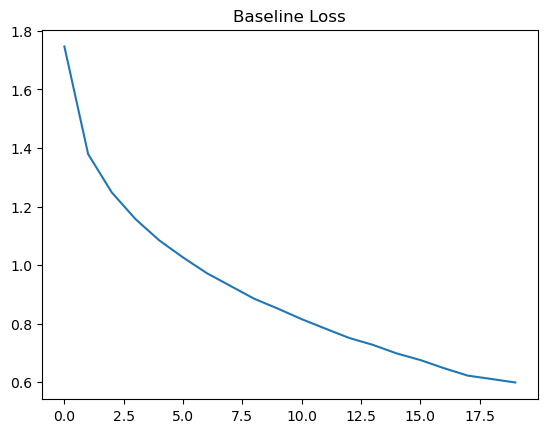

In [68]:
loss_df_base.mean(axis=1).plot()
plt.title('Baseline Loss')

In [73]:
test_df_base.mean(axis=1)

Test score/loss    1.036241
Test accuracy      0.664260
dtype: float64

In [19]:
# 5 runs
result_df = pd.DataFrame(columns=['accuracy', 'loss'])
for i in range(5):
    print(f'{i} run------------------------')
    # network definition
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))

    print('CNN network definition.')

    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    # training/fitting of the DNN model
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

    #Testing
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])
    result_df.loc[i, 'accuracy'] = score[1]
    result_df.loc[i, 'loss'] = score[0]

0 run------------------------
CNN network definition.
Epoch 1/20
313/313 [==============================] - 21s 64ms/step - loss: 1.6851 - accuracy: 0.4015 - val_loss: 1.3551 - val_accuracy: 0.5181
Epoch 2/20
313/313 [==============================] - 19s 61ms/step - loss: 1.3453 - accuracy: 0.5242 - val_loss: 1.2623 - val_accuracy: 0.5482
Epoch 3/20
313/313 [==============================] - 18s 59ms/step - loss: 1.2141 - accuracy: 0.5709 - val_loss: 1.1909 - val_accuracy: 0.5850
Epoch 4/20
313/313 [==============================] - 18s 59ms/step - loss: 1.1234 - accuracy: 0.6053 - val_loss: 1.0999 - val_accuracy: 0.6139
Epoch 5/20
313/313 [==============================] - 19s 60ms/step - loss: 1.0515 - accuracy: 0.6309 - val_loss: 1.0915 - val_accuracy: 0.6215
Epoch 6/20
313/313 [==============================] - 19s 59ms/step - loss: 0.9858 - accuracy: 0.6578 - val_loss: 1.0823 - val_accuracy: 0.6196
Epoch 7/20
313/313 [==============================] - 19s 60ms/step - loss: 0.9362

In [20]:
result_df

,accuracy,loss
0,0.6816,1.047617
1,0.6657,1.037859
2,0.675,1.041924
3,0.6724,1.09073
4,0.6671,1.091653


In [21]:
result_df[['accuracy', 'loss']].mean()

accuracy    0.672360
loss        1.061957
dtype: float64

79/79 [==============================] - 1s 11ms/step - loss: 1.1612 - accuracy: 0.5852

Test score/loss: 1.1611535549163818
Test accuracy: 0.5852000117301941
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


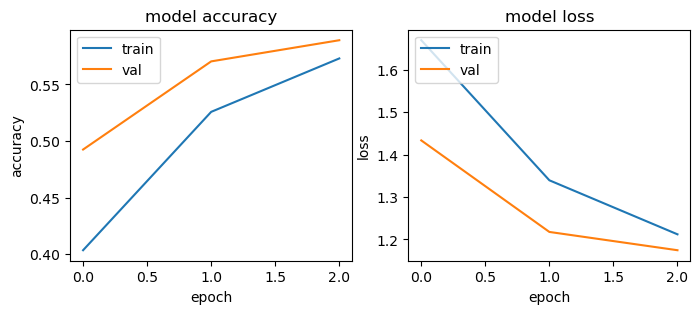

In [26]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Model 2: Deeper model

In [35]:
# 5 runs
result_df = pd.DataFrame(columns=['accuracy', 'loss'])
for i in range(5):
    print(f'{i} run------------------------')
    # network definition

    deeper_model = Sequential()
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))

    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))

    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))
    
    deeper_model.add(Flatten())
    deeper_model.add(Dense(512))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Dropout(0.5))

    deeper_model.add(Flatten())
    deeper_model.add(Dense(512))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Dropout(0.5))

    deeper_model.add(Dense(N_CLASSES))
    deeper_model.add(Activation('softmax'))

    print('CNN network definition.')


    deeper_model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    # training/fitting of the DNN model
    history = deeper_model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

    #Testing
    score = deeper_model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])
    result_df.loc[i, 'accuracy'] = score[1]
    result_df.loc[i, 'loss'] = score[0]

0 run------------------------
CNN network definition.
Epoch 1/20
313/313 [==============================] - 31s 95ms/step - loss: 1.9853 - accuracy: 0.2659 - val_loss: 1.7646 - val_accuracy: 0.3590
Epoch 2/20
313/313 [==============================] - 27s 87ms/step - loss: 1.6270 - accuracy: 0.4027 - val_loss: 1.4378 - val_accuracy: 0.4808
Epoch 3/20
313/313 [==============================] - 25s 79ms/step - loss: 1.4690 - accuracy: 0.4640 - val_loss: 1.5145 - val_accuracy: 0.4685
Epoch 4/20
313/313 [==============================] - 26s 84ms/step - loss: 1.3469 - accuracy: 0.5128 - val_loss: 1.3551 - val_accuracy: 0.5167
Epoch 5/20
313/313 [==============================] - 26s 82ms/step - loss: 1.2530 - accuracy: 0.5516 - val_loss: 1.4691 - val_accuracy: 0.5077
Epoch 6/20
313/313 [==============================] - 26s 83ms/step - loss: 1.1881 - accuracy: 0.5784 - val_loss: 1.0448 - val_accuracy: 0.6347
Epoch 7/20
313/313 [==============================] - 28s 90ms/step - loss: 1.1275

Exception ignored in: <function UniquePtr.__del__ at 0x0000024B51A0EB80>
Traceback (most recent call last):
  File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 71, in __del__
    obj = self._obj
AttributeError: _obj


313/313 [==============================] - 34s 103ms/step - loss: 2.0322 - accuracy: 0.2506 - val_loss: 1.7834 - val_accuracy: 0.3484
Epoch 2/20
313/313 [==============================] - 29s 94ms/step - loss: 1.6662 - accuracy: 0.3902 - val_loss: 1.4445 - val_accuracy: 0.4642
Epoch 3/20
313/313 [==============================] - 30s 95ms/step - loss: 1.4986 - accuracy: 0.4536 - val_loss: 1.4717 - val_accuracy: 0.4597
Epoch 4/20
313/313 [==============================] - 27s 86ms/step - loss: 1.3864 - accuracy: 0.4990 - val_loss: 1.3315 - val_accuracy: 0.5093
Epoch 5/20
313/313 [==============================] - 25s 80ms/step - loss: 1.2942 - accuracy: 0.5376 - val_loss: 1.1481 - val_accuracy: 0.5842
Epoch 6/20
313/313 [==============================] - 27s 88ms/step - loss: 1.2247 - accuracy: 0.5646 - val_loss: 1.1222 - val_accuracy: 0.6030
Epoch 7/20
313/313 [==============================] - 30s 96ms/step - loss: 1.1633 - accuracy: 0.5862 - val_loss: 1.0068 - val_accuracy: 0.6365
Ep

In [36]:
result_df

,accuracy,loss
0,0.7216,0.840658
1,0.7149,0.821284
2,0.7159,0.831369
3,0.7328,0.782519
4,0.7293,0.787563


In [37]:
result_df[['accuracy', 'loss']].mean()

accuracy    0.722900
loss        0.812679
dtype: float64

79/79 [==============================] - 1s 18ms/step - loss: 0.7876 - accuracy: 0.7293

Test score/loss: 0.787563145160675
Test accuracy: 0.7293000221252441
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


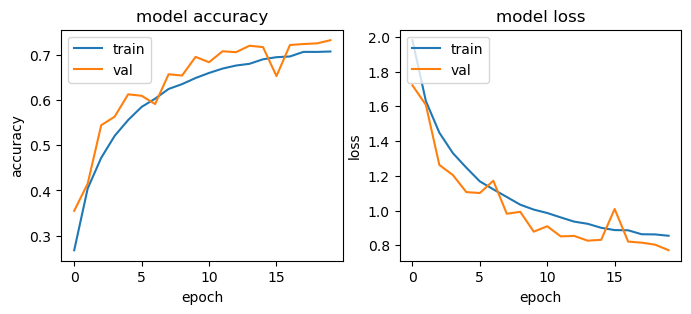

In [38]:
#Testing
score = deeper_model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Model 3: Data Augmentation

In [132]:
from tqdm import tqdm

In [133]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest',
   validation_split=VALIDATION_SPLIT)

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


#fit the dataset
datagen.fit(input_X_train)


Augmenting training set images...


In [134]:
deeper_model = Sequential()
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Flatten())
deeper_model.add(Dense(512))
deeper_model.add(Activation('relu'))
deeper_model.add(Dropout(0.5))

deeper_model.add(Flatten())
deeper_model.add(Dense(512))
deeper_model.add(Activation('relu'))
deeper_model.add(Dropout(0.5))

deeper_model.add(Dense(N_CLASSES))
deeper_model.add(Activation('softmax'))

print('CNN network definition.')


deeper_model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

CNN network definition.


In [135]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(
    datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE, subset='training'), 
    validation_data=datagen.flow(input_X_train, output_Y_train, batch_size=8, subset='validation'),
    steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=5, verbose=VERBOSE
)


Epoch 1/5
  1/390 [..............................] - ETA: 42s - loss: 1.4412 - accuracy: 0.5156

C:\Users\1192k\AppData\Local\Temp\ipykernel_30880\2157172187.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


390/390 [==============================] - 38s 97ms/step - loss: 1.5122 - accuracy: 0.4721 - val_loss: 1.3594 - val_accuracy: 0.5247


In [136]:
# plotting helper function
def plot_history(target_model, test_x, test_y, learning_history):
    #Testing
    score = target_model.evaluate(test_x, test_y, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(learning_history.history.keys())

    # summarize history for accuracy
    #plt.plot(mo)
    plt.plot(learning_history.history['accuracy'])
    plt.plot(learning_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(learning_history.history['loss'])
    plt.plot(learning_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()



In [137]:
plot_history(model, input_X_test, output_y_test, history)

ValueError: in user code:

    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


## Model 3-2: Data Augmentation
- https://www.tensorflow.org/tutorials/images/classification#compile_the_model
- https://www.tensorflow.org/tutorials/images/data_augmentation

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT)

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
train_datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest'
   # validation_split=VALIDATION_SPLIT
   )

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift

train_datagen.fit(X_train)
train_data = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

Augmenting training set images...


In [110]:
val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)
val_data = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

In [111]:
train_generator = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE, subset='training')
validation_generator = datagen.flow(X_val, y_val, batch_size=BATCH_SIZE, subset='validation')

In [112]:
history = deeper_model.fit_generator(train_data, epochs=5, validation_data=val_data, verbose=VERBOSE)

Epoch 1/5


C:\Users\1192k\AppData\Local\Temp\ipykernel_30880\947434083.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = deeper_model.fit_generator(train_data, epochs=5, validation_data=val_data, verbose=VERBOSE)


313/313 [==============================] - 31s 98ms/step - loss: 1.3554 - accuracy: 0.5307 - val_loss: 1.0546 - val_accuracy: 0.6252
Epoch 2/5
313/313 [==============================] - 30s 95ms/step - loss: 1.3418 - accuracy: 0.5316 - val_loss: 0.9923 - val_accuracy: 0.6566
Epoch 3/5
313/313 [==============================] - 31s 100ms/step - loss: 1.3211 - accuracy: 0.5408 - val_loss: 1.1421 - val_accuracy: 0.6023
Epoch 4/5
313/313 [==============================] - 33s 104ms/step - loss: 1.3218 - accuracy: 0.5436 - val_loss: 1.0581 - val_accuracy: 0.6366
Epoch 5/5
313/313 [==============================] - 35s 113ms/step - loss: 1.3157 - accuracy: 0.5422 - val_loss: 1.2166 - val_accuracy: 0.5876


79/79 [==============================] - 1s 11ms/step - loss: 1.2810 - accuracy: 0.5743

Test score/loss: 1.2810337543487549
Test accuracy: 0.5742999911308289
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


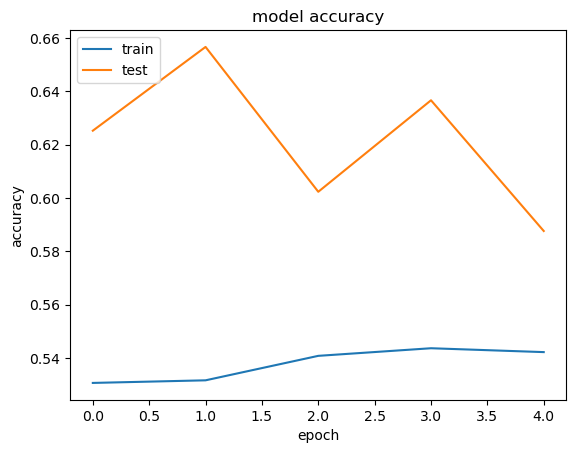

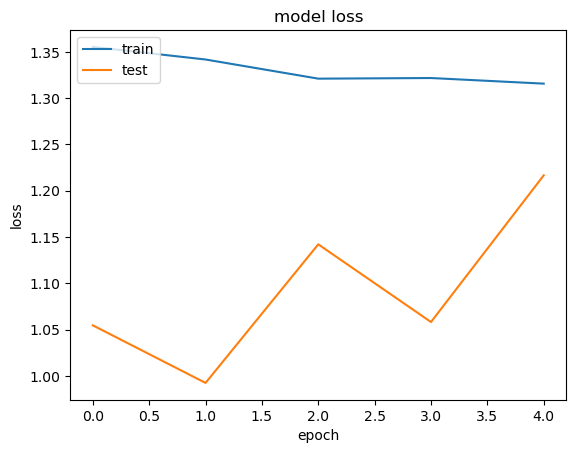

In [114]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## Model 3-3 Data Augmentation
- https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb

In [139]:
deeper_model = Sequential()
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
deeper_model.add(Activation('relu'))
deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
deeper_model.add(Dropout(0.25))

deeper_model.add(Flatten())
deeper_model.add(Dense(512))
deeper_model.add(Activation('relu'))
deeper_model.add(Dropout(0.5))

deeper_model.add(Flatten())
deeper_model.add(Dense(512))
deeper_model.add(Activation('relu'))
deeper_model.add(Dropout(0.5))

deeper_model.add(Dense(N_CLASSES))
deeper_model.add(Activation('softmax'))

print('CNN network definition.')


deeper_model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

CNN network definition.


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT)

In [141]:
# train with image augmentation
history2=deeper_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch = len(X_train) / 128, epochs=5, validation_data=(X_val, y_val))


Epoch 1/5


C:\Users\1192k\AppData\Local\Temp\ipykernel_30880\1161036969.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=deeper_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),


312/312 [==============================] - 29s 93ms/step - loss: 2.0775 - accuracy: 0.2292 - val_loss: 1.8191 - val_accuracy: 0.3240
Epoch 2/5
312/312 [==============================] - 34s 109ms/step - loss: 1.8587 - accuracy: 0.3196 - val_loss: 1.6566 - val_accuracy: 0.3719
Epoch 3/5
312/312 [==============================] - 32s 101ms/step - loss: 1.7484 - accuracy: 0.3610 - val_loss: 1.5539 - val_accuracy: 0.4091
Epoch 4/5
312/312 [==============================] - 30s 97ms/step - loss: 1.6658 - accuracy: 0.3967 - val_loss: 1.3999 - val_accuracy: 0.4818
Epoch 5/5
312/312 [==============================] - 35s 111ms/step - loss: 1.6018 - accuracy: 0.4187 - val_loss: 1.4381 - val_accuracy: 0.4578


79/79 [==============================] - 1s 17ms/step - loss: 1.4318 - accuracy: 0.4643

Test score/loss: 1.4317822456359863
Test accuracy: 0.4643000066280365
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


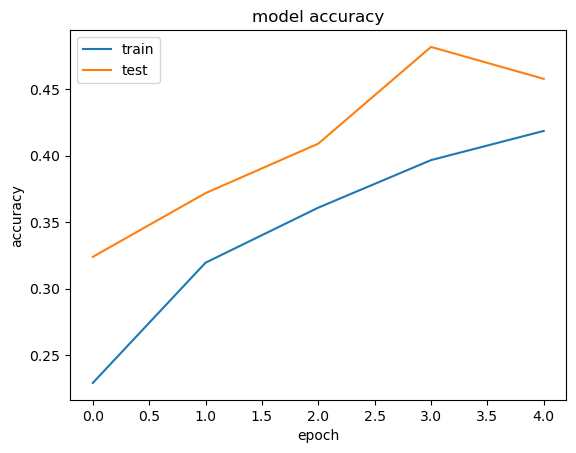

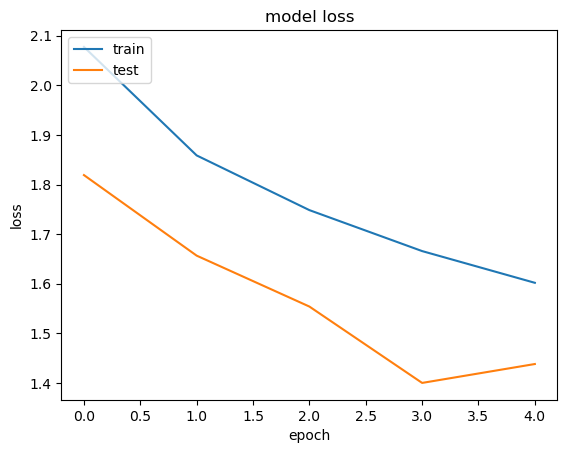

In [149]:
plot_history(deeper_model, input_X_test, output_Y_test, history2)

## Model 4: ResNet
- https://www.kaggle.com/code/kutaykutlu/resnet50-transfer-learning-cifar-10-beginner

In [160]:
def feature_extractor(inputs):
    feature_extractor = tf.keras.applications.ResNet50(input_shape=(IMG_COLS, IMG_ROWS, IMG_CHANNELS), 
                                                       include_top=False, weights='imagenet')(inputs)
                                                       
    return feature_extractor


def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(N_CLASSES, activation="softmax", name="classification")(x)

    return x


def final_model(inputs):
    resize = tf.keras.layers.UpSampling2D((7, 7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output


def define_compilie_model():
    inputs = tf.keras.layers.Input(shape=(IMG_COLS, IMG_ROWS, IMG_CHANNELS))

    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)

    model.compile(optimizer='SGD', loss='sparse_categorical_crosentropy', metrics=['accuracy'])

    return model


In [161]:
model = define_compilie_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_33 (Flatten)        (None, 2048)              0         
                                                                 
 dense_56 (Dense)            (None, 1024)              2098

In [163]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val  , y_val))

Epoch 1/3


ValueError: in user code:

    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_1" "                 f"(type Functional).
    
    Input 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 224, 224, 3)
    
    Call arguments received by layer "model_1" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


In [4]:
X_train.shape

NameError: name 'X_train' is not defined

## Model 4-2 resnet
- resnet50-transdfer-learning-cifar-10-beginner.ipynb (https://www.kaggle.com/code/kutaykutlu/resnet50-transfer-learning-cifar-10-beginner)


In [ ]:
# utility to display training and validation curves
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [32]:
import tensorflow as tf
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              2098

In [38]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

(training_images, training_labels) , (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(training_images, training_labels, test_size=VALIDATION_SPLIT)

processed_X_train = preprocess_image_input(X_train)
processed_X_val = preprocess_image_input(X_val)
processed_X_test = preprocess_image_input(test_images)

In [40]:
processed_X_train.shape, y_train.shape, processed_X_val.shape, y_val.shape, processed_X_test.shape, test_labels.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

In [50]:
import pandas as pd
from tqdm import tqdm

In [52]:
EPOCHS = 3
result_df = pd.DataFrame(columns=['test_loss', 'test_accuracy'])
for i in tqdm(range(5)):
    print(f'{i}th run-----------------------')
    model = define_compile_model()
    history = model.fit(processed_X_train, y_train, epochs=EPOCHS, validation_data = (processed_X_val, y_val), batch_size=64)
    loss, accuracy = model.evaluate(processed_X_test, test_labels, batch_size=64)
    result_df.loc[i]['test_loss'] = loss
    result_df.loc[i]['test_accuracy'] = accuracy


  0%|          | 0/5 [00:00<?, ?it/s]

0th run-----------------------
Epoch 1/3
 20/625 [..............................] - ETA: 1:07:01 - loss: 2.0800 - accuracy: 0.3031

  0%|          | 0/5 [02:27<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
plot_metrics('loss', 'Loss', ylim=2)

In [ ]:
plot_metrics('accuracy', 'Accuracy', ylim=1)

# Parameter Tuning

In [74]:
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import PReLU
from sklearn.preprocessing import StandardScaler

# Baseline Parameter
base_param = {
    'input_dropout': 0.0,
    'hidden_layers': 3,
    'hidden_units': 96,
    'hidden_activation': 'relu',
    'hidden_dropout': 0.2,
    'batch_norm': 'before_act',
    'optimizer': {'type': 'adam', 'lr': 0.001},
    'batch_size': 64,
}

# Set exploration space
param_space = {
    'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
    'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
    'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
    'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
    'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
    'batch_norm': hp.choice('batch_norm', ['before_act', 'no']),
    'optimizer': hp.choice('optimizer', 
                           [{'type': 'adam', 'lr': hp.loguniform('adam_lr', np.log(0.0001), np.log(0.1))},
                            {'type': 'rmsprop', 'lr': hp.loguniform('rmsprop_lr', np.log(0.0001), np.log(0.1))},
                            {'type': 'sgd', 'lr': hp.loguniform('sgd_lr', np.log(0.0001), np.log(0.1))}]),
    'batch_size': hp.quniform('batch_size', 32, 128, 32),
}

class CNN_parameter_tuning:
    def __init__(self, params) -> None:
        self.params = params
        self.scaler = None
        self.model = None
    
    def fit(self, tr_x, tr_y, val_x, val_y):

        # parameter setting
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        batch_norm = self.params['batch_norm']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        self.model = Sequential()

        # Input layer
        # self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        # Hidden layers
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            if batch_norm == 'before_act':
                self.model.add(BatchNormalization())
            if hidden_activation == 'prelu':
                self.model.add(PReLU())
            elif hidden_activation == 'relu':
                self.model.add(Activation('relu'))
            else:
                raise NotImplementedError
            self.model.add(Dropout(hidden_dropout))

        # Output layer
        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))
        self.model.add(Dense(N_CLASSES, activation='softmax'))

        # Optimizer

# Parameter tuning 2
- https://www.analyticsvidhya.com/blog/2021/06/create-convolutional-neural-network-model-and-optimize-using-keras-tuner-deep-learning/
- https://www.kaggle.com/code/rahulkumarpatro/optimising-cnn-using-keras-tuner


In [79]:
def build_model(hp):
    # create model object
    model = Sequential()
    model.add(Conv2D(
        #adding filter
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        padding='same',
        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)
    )),
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu',
        padding='same'
    )),
    model.add(MaxPooling2D(pool_size=(2,2))),
    model.add(Flatten()),
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
    )),
    model.add(Dropout(0.5)),
    model.add(Dense(N_CLASSES, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

    return model


In [80]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='output', project_name="Mnist Fashion")

In [82]:
tuner_search.search(input_X_train, output_Y_train, epochs=3, validation_split=VALIDATION_SPLIT)

Trial 5 Complete [00h 03m 44s]
val_accuracy: 0.5946999788284302

Best val_accuracy So Far: 0.6151000261306763
Total elapsed time: 00h 16m 07s
INFO:tensorflow:Oracle triggered exit


In [83]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        3648      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 48)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 96)                1179744   
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                        

## Parameter Tuning 3
Tensorflow tutorial
- https://www.tensorflow.org/tutorials/keras/keras_tuner

In [84]:
def build_model_tutorial(hp):
    # create model object
    model = Sequential()
    model.add(Conv2D(
        #adding filter
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        padding='same',
        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)
    )),
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu',
        padding='same'
    )),
    model.add(MaxPooling2D(pool_size=(2,2))),
    model.add(Flatten()),
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
    )),
    model.add(Dropout(0.5)),
    model.add(Dense(N_CLASSES, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=hp_learning_rate), 
                  metrics=['accuracy'])

    return model


In [86]:
import keras_tuner as kt

tuner = kt.Hyperband(build_model_tutorial,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                        project_name='intro_to_kt')


In [87]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [88]:
tuner.search(input_X_train, output_Y_train, epochs=50, validation_split=VALIDATION_SPLIT, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [06h 04m 38s]
val_accuracy: 0.10249999910593033

Best val_accuracy So Far: 0.6567000150680542
Total elapsed time: 08h 40m 20s
INFO:tensorflow:Oracle triggered exit


KeyError: 'units does not exist.'

In [93]:
best_hps.get('conv_1_filter')

80

In [95]:
# Train the model with the optimal hyperparameters and run the trained model on the test set
model = tuner.hypermodel.build(best_hps)
history = model.fit(input_X_train, output_Y_train, epochs=50, validation_split=VALIDATION_SPLIT, callbacks=[stop_early])


Epoch 1/50
 547/1250 [============>.................] - ETA: 26s - loss: 1.8631 - accuracy: 0.3028

KeyboardInterrupt: 

In [ ]:

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [15]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/40


C:\Users\1192k\AppData\Local\Temp\ipykernel_31684\3979763547.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


390/390 [==============================] - 33s 83ms/step - loss: 1.4824 - accuracy: 0.4856
Epoch 2/40
390/390 [==============================] - 35s 91ms/step - loss: 1.4329 - accuracy: 0.5044
Epoch 3/40
390/390 [==============================] - 33s 84ms/step - loss: 1.4105 - accuracy: 0.5091
Epoch 4/40
390/390 [==============================] - 34s 86ms/step - loss: 1.3955 - accuracy: 0.5158
Epoch 5/40
390/390 [==============================] - 33s 83ms/step - loss: 1.3896 - accuracy: 0.5172
Epoch 6/40
390/390 [==============================] - 34s 87ms/step - loss: 1.3759 - accuracy: 0.5230
Epoch 7/40
390/390 [==============================] - 33s 84ms/step - loss: 1.3629 - accuracy: 0.5234
Epoch 8/40
390/390 [==============================] - 33s 86ms/step - loss: 1.3598 - accuracy: 0.5264
Epoch 9/40
390/390 [==============================] - 33s 85ms/step - loss: 1.3548 - accuracy: 0.5276
Epoch 10/40
390/390 [==============================] - 34s 87ms/step - loss: 1.3509 - accurac

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

79/79 [==============================] - 1s 16ms/step - loss: 1.1579 - accuracy: 0.5841

Test score/loss: 1.1578571796417236
Test accuracy: 0.5841000080108643
dict_keys(['loss', 'accuracy'])


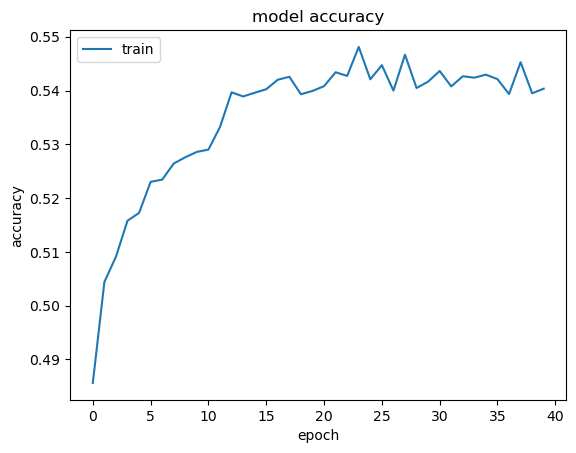

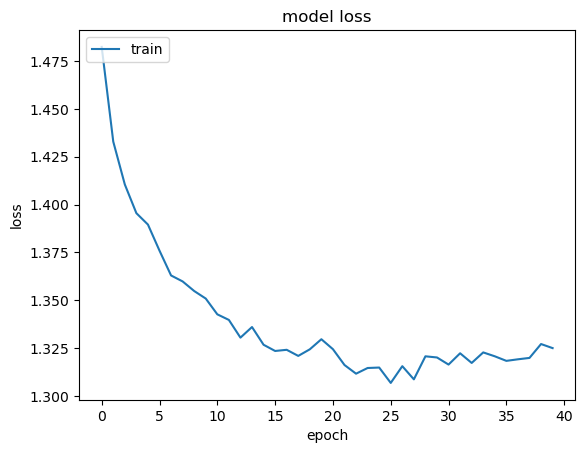

In [16]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [20]:
# want to add val plot
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT, random_state=42)

# Train the model using data augmentation and validation data
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                              epochs=N_EPOCH,
                              verbose=VERBOSE,
                              validation_data=(X_val, Y_val))


C:\Users\1192k\AppData\Local\Temp\ipykernel_31684\3542207279.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/40
312/312 [==============================] - 34s 109ms/step - loss: 1.1027 - accuracy: 0.6200 - val_loss: 0.9239 - val_accuracy: 0.6679
Epoch 2/40
312/312 [==============================] - 38s 121ms/step - loss: 1.0804 - accuracy: 0.6296 - val_loss: 0.8757 - val_accuracy: 0.6913
Epoch 3/40
312/312 [==============================] - 33s 104ms/step - loss: 1.0778 - accuracy: 0.6337 - val_loss: 0.8734 - val_accuracy: 0.6931
Epoch 4/40
312/312 [==============================] - 31s 99ms/step - loss: 1.0687 - accuracy: 0.6339 - val_loss: 1.0162 - val_accuracy: 0.6454
Epoch 5/40
312/312 [==============================] - 32s 102ms/step - loss: 1.0604 - accuracy: 0.6353 - val_loss: 0.9898 - val_accuracy: 0.6536
Epoch 6/40
312/312 [==============================] - 30s 97ms/step - loss: 1.0576 - accuracy: 0.6375 - val_loss: 0.9435 - val_accuracy: 0.6722
Epoch 7/40
312/312 [==============================] - 32s 102ms/step - loss: 1.0495 - accuracy: 0.6403 - val_loss: 0.9529 - val_accu

79/79 [==============================] - 2s 20ms/step - loss: 0.8564 - accuracy: 0.7051

Test score/loss: 0.8564433455467224
Test accuracy: 0.7050999999046326
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


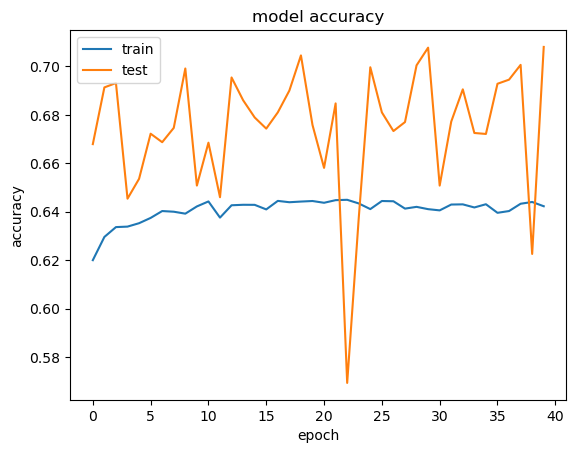

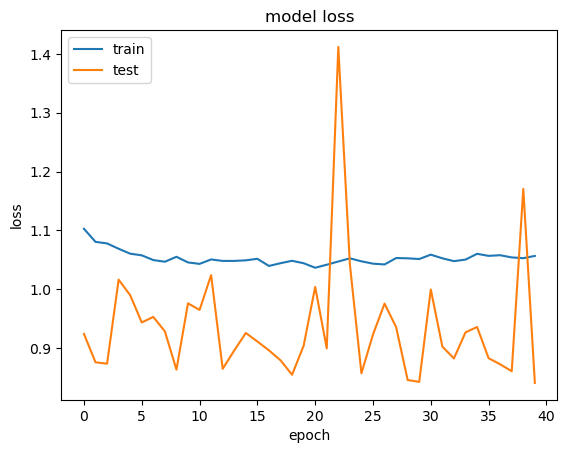

In [25]:
# Plot with validation data
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [17]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.